# Predicting Insurance Costs With Linear Regression

## 1. Introduction

This project aims to forecast insurance costs by using Linear Regression on the [Medical Cost Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download) from Kaggle, which contains information on individual medical insurance bills, where each bill is associated with some demographic and personal characteristics of its recipient.

Of interest is how the different characteristics relate to the **total medical cost**, which is a continuous, positive number. The goal is to construct the best possible predictive model for the cost, given some information about the patient. Predicting medical costs is an important task as it allows hospitals to predict revenue and plan necessary procedures needed by its patient population.

In [1]:
# Include data dictionary?

In [2]:
# Load the relevant libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
# Read the data into a dataframe
insurance = pd.read_csv('insurance.csv')

# Let's take a look at the first 5 rows of the dataframe
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploring the Dataset

In [4]:
# Check the number of features and observations in the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 7 columns and 1338 rows in the dataset.

In [5]:
# Count how many columns are of each of the data types
insurance.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

There are 3 columns of the string type (sex, smoker, region); two columns containing integers (age, children); and two columns with floats (bmi and charges).

In [6]:
# Double check for missing values
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in any of the columns.

### EDA: Descriptive Statistics

In [7]:
# Display the descriptive statistics for the dataframe
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Display the descriptive statistics for the categorical columns in the dataframe
insurance.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### EDA: Visualisations

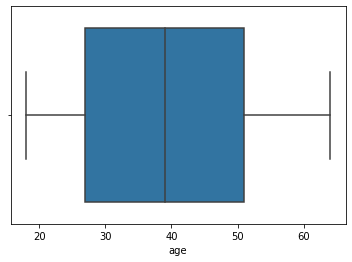

<Figure size 432x288 with 0 Axes>

In [9]:
ax = sns.boxplot(x="age", data=insurance)
plt.show()
plt.clf()

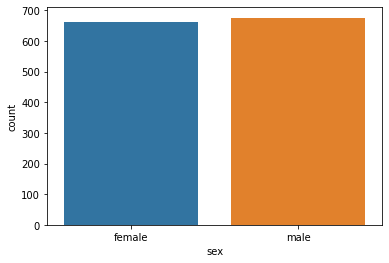

<Figure size 432x288 with 0 Axes>

In [10]:
ax = sns.countplot(x="sex", data=insurance)
plt.show()
plt.clf()

We have roughly the same number of females and males. 

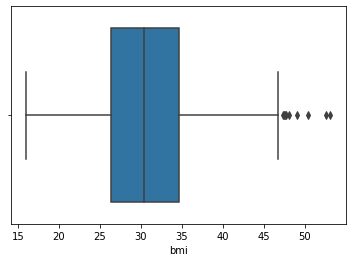

<Figure size 432x288 with 0 Axes>

In [11]:
ax = sns.boxplot(x='bmi', data=insurance)
plt.show()
plt.clf()

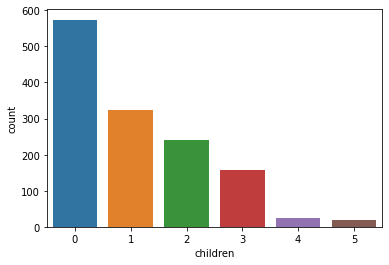

<Figure size 432x288 with 0 Axes>

In [12]:
ax = sns.countplot(x="children", data=insurance)
plt.show()
plt.clf()

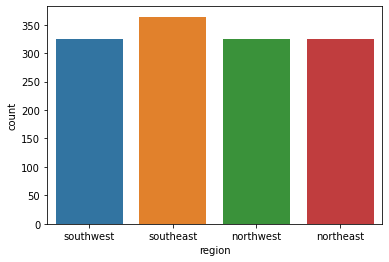

<Figure size 432x288 with 0 Axes>

In [13]:
ax = sns.countplot(x="region", data=insurance)
plt.show()
plt.clf()

We have roughly an equal amount of people in each region.

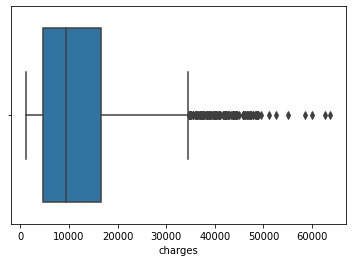

<Figure size 432x288 with 0 Axes>

In [14]:
ax = sns.boxplot(x='charges', data=insurance)
plt.show()
plt.clf()

Let's create a Pearson's correlation heat map to explore how the columns correlate to one another.

<AxesSubplot:>

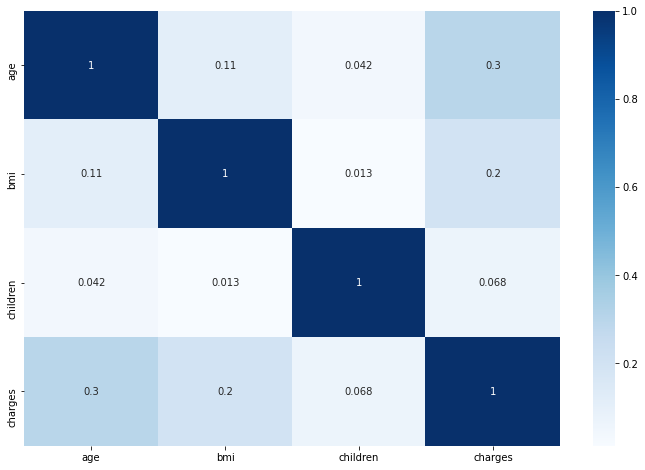

In [15]:
correlations = insurance.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap='Blues')

Let's look at the categorical columns. First, let's convert them to numerical columns.

In [16]:
# Make a copy of the dataframe
insurance_mod = insurance.copy()

In [17]:
# Get the value counts for the 'sex' column for checking purposes later on
insurance_mod['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
# Replace the values in the 'sex' column with 1 for 'male' and 0 for 'female'
insurance_mod['sex'] = insurance_mod['sex'].apply(lambda x:1 if x == 'male' else 0)

In [19]:
# Get the value counts for the 'sex' column to check the conversion from categorical to numerical
insurance_mod['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [20]:
# Get the value counts for the 'smoker' column for checking purposes later on
insurance_mod['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [21]:
# Replace the values in the 'smoker' column with 1 for 'yes' and 0 for 'no'
insurance_mod['smoker'] = insurance_mod['smoker'].apply(lambda x:1 if x == 'yes' else 0)